In [2]:
import numpy as np
import os
import random

In [3]:
# point_map = {}
class Agent():
    def __init__(self):
        self.points = 0
        self.cards = ['A'] + [str(i) for i in range(2,11)] + ['10']*3
        self.usable_ace = False
    def action(self):
        if self.points<20:
            # if random.random()>0.5:
            # print(random.randint(0,len(self.cards)))
            # print(self.cards)
            card_sampled = self.cards[np.random.randint(0,len(self.cards))]
            if card_sampled == 'A' and self.points + 11 <=21:
                self.points += 11
                self.usable_ace = True
            elif card_sampled=='A' and self.points + 11 > 21:
                self.points += 1
                self.usable_ace = False
            else:
                self.usable_ace = False
                self.points += int(card_sampled)
            return card_sampled
        else:
            return 'S'
    def check(self):
        if self.points <=21:
            return False
        return True
              

class Dealer():
    def __init__(self):
        self.points = 0
        self.cards = ['A'] + [str(i) for i in range(2,11)] + ['10']*3
        self.showing_card = None
    def action(self):
        if self.points<17:
            card_sampled = self.cards[np.random.randint(0,len(self.cards))]
            self.showing_card = card_sampled
            if card_sampled == 'A' and self.points + 11 <=21:
                self.points += 11
            
            elif card_sampled=='A' and self.points + 11 > 21:
                self.points += 1
            else:
                self.points += int(card_sampled)
            return card_sampled        
        else:
            return 'S'
        
    def check(self):
        if self.points >21:
            return 'B'
        elif self.points == 21:
            return 'W'
        else:
            return True
        
        
## continue coding the black jack env by simulating the moves for a fixed trajectory length *from 6:56 PM yesterday
# class dealer(agent):
class blackjack():
    def __init__(self,dealer,agent):
        # self.cards = ['A'] + [str(i) for i in range(2,11)] + ['10']*3
        self.game_state = None
        self.turn_flag = 0
        self.turn = ['A','D']
        
        self.dealer = dealer
        self.agent = agent

        self.players = {'D':self.dealer,'A':self.agent}

    def hit(self):
        return self.cards[np.random.randint(0,len(self.cards))]        
    # player cards sum, usable ace yes/no, dealer card showing

    def stick(self):
        self.turn_flag+=1
        self.turn_flag%=2
        return self.turn[self.turn_flag]
    
    def episode(self):
        T = 30
        t = 0
        self.ep = []
        # initial cards
        CD = self.players['D'].action()
        CA = self.players['A'].action()
        # print(CA,CD)
        self.ep.append([self.players['A'].points,
                self.players['D'].showing_card,
                self.players['A'].usable_ace])

        while t<T:
            t+=1
            
            # print('time step = ',t,'   A',self.players['A'].points,'D',self.players['D'].points)
            if self.players['A'].points == 21 and self.players['D'].points<21:
                # self.ep.append([self.players['A'].points,
                #             self.players['D'].showing_card,
                #             self.players['A'].usable_ace])
                # print('1')
                return +1
            
            if self.players['D'].points>21:
                # self.ep.append([self.players['A'].points,
                #                 self.players['D'].showing_card,
                #                 self.players['A'].usable_ace])

                # print('2')
                return +1

            elif self.players['D'].points==21 and self.players['A'].points==21:
                # self.ep.append([self.players['A'].points,
                #                 self.players['D'].showing_card,
                #                 self.players['A'].usable_ace])
                # print('3')      
                return 0

            elif self.players['D'].points==21 and self.players['A'].points<21:
                # self.ep.append([self.players['A'].points,
                #                 self.players['D'].showing_card,
                #                 self.players['A'].usable_ace])
                # print('4') 
                return -1

            if not (self.players['A'].check()):
                
                # first the player will move then the dealer 
                player = self.players[self.turn[self.turn_flag]]
                action = player.action()
                # print('action = ',action)
                if action == 'S':
                    self.stick()
                    self.ep.append([self.players['A'].points,
                                self.players['D'].showing_card,
                                self.players['A'].usable_ace])

                else:
                    self.ep.append([self.players['A'].points,
                                self.players['D'].showing_card,
                                self.players['A'].usable_ace])

            else:
                # self.ep.append([self.players['A'].points,
                #     self.players['D'].showing_card,
                #     self.players['A'].usable_ace])

                return -1

        # print('A',self.players['A'].points,'D',self.players['D'].points)
        
        # if exited the loop due to infinite sticking

        if (self.players['A'].points>self.players['D'].points):
            return +1
        elif self.players['A'].points==self.players['D'].points:
            return 0
        else:
            return -1
            


In [4]:
def first_visit_MC(state_list,final_reward,   returns = {},num_trials=100000):
    k = len(state_list)-1
    G = 0
    G += final_reward/num_trials
    while k>-1:
        state = state_list[k]
        # print(state)
        if '_'.join([str(state[i]) for i in range(0,len(state))]) not in returns:
            returns['_'.join([str(state[i]) for i in range(0,len(state))]) ] =0
        
        if state not in state[:k]:
            returns['_'.join([str(state[i]) for i in range(0,len(state))])] += G
        k-=1
    return returns

In [5]:
returns = {}
num_trials = 100000#100000
for _ in range(0,num_trials):
    random.seed()
    dealer = Dealer()
    agent = Agent()
    # print('p')
    b = blackjack(dealer,agent)
    

    final_reward = b.episode()
    episode = b.ep
    # print(episode)
    results = ['Draw','Win','Lose']
    returns = first_visit_MC(episode,final_reward,returns,num_trials)    


In [16]:
returns

{'24_10_False': -0.028889999999998993,
 '14_10_False': -0.02259999999999925,
 '5_10_False': -0.014329999999999584,
 '25_10_False': -0.02648999999999909,
 '15_10_False': -0.02456999999999917,
 '6_10_False': -0.01615999999999951,
 '26_4_False': -0.0055399999999999425,
 '18_4_False': -0.007989999999999843,
 '12_4_False': -0.004499999999999985,
 '2_4_False': -0.0028300000000000066,
 '28_2_False': -0.00462999999999998,
 '18_2_False': -0.007679999999999855,
 '16_2_False': -0.00681999999999989,
 '8_2_False': -0.004639999999999979,
 '21_6_False': 0.009719999999999772,
 '11_6_False': 0.00025,
 '7_6_False': -0.004060000000000003,
 '22_10_False': -0.03390999999999971,
 '4_10_False': -0.01271999999999965,
 '20_6_False': 0.1911500000000504,
 '20_10_False': 0.6511599999996713,
 '10_6_False': -0.0027200000000000063,
 '21_8_False': 0.009729999999999772,
 '16_8_False': -0.006029999999999923,
 '10_8_False': -0.0009100000000000017,
 '23_10_False': -0.0312699999999989,
 '16_10_False': -0.02768999999999904

In [6]:
returns.keys()

dict_keys(['24_10_False', '14_10_False', '5_10_False', '25_10_False', '15_10_False', '6_10_False', '26_4_False', '18_4_False', '12_4_False', '2_4_False', '28_2_False', '18_2_False', '16_2_False', '8_2_False', '21_6_False', '11_6_False', '7_6_False', '22_10_False', '4_10_False', '20_6_False', '20_10_False', '10_6_False', '21_8_False', '16_8_False', '10_8_False', '23_10_False', '16_10_False', '9_10_False', '23_3_False', '17_3_False', '10_3_False', '5_3_False', '3_3_False', '28_8_False', '18_8_False', '22_9_False', '16_9_False', '14_9_False', '12_9_False', '3_9_False', '19_8_False', '15_8_False', '11_8_False', '8_8_False', '27_7_False', '17_7_False', '10_7_False', '20_7_False', '19_7_False', '9_7_False', '28_5_False', '18_5_False', '15_5_False', '7_5_False', '16_4_False', '11_4_False', '8_4_False', '5_9_False', '8_10_False', '24_4_False', '7_4_False', '21_A_False', '11_A_True', '21_10_False', '19_10_False', '11_10_False', '2_10_False', '20_5_False', '17_5_False', '5_5_False', '13_10_False

In [8]:
import matplotlib.pyplot as plt


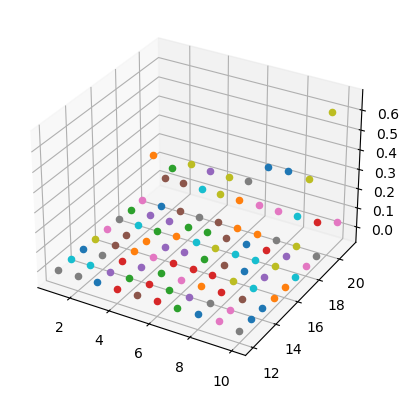

In [17]:
ax = plt.axes(projection='3d')
for k in returns:
    if 'False' in k:
        s0 = int(k.split('_')[0])
        if s0>=12 and s0 <=21:
            try:
                s1 = int(k.split('_')[1])
            except:
                s1 = 1
            # print(s0,s1)
            ax.scatter3D(s1,s0,returns[k])


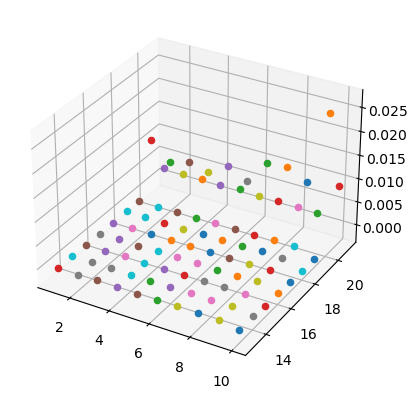

In [18]:
ax = plt.axes(projection='3d')
for k in returns:
    if 'True' in k:
        s0 = int(k.split('_')[0])
        if s0>=12 and s0 <=21:
            try:
                s1 = int(k.split('_')[1])
            except:
                s1 = 1
            # print(s0,s1)
            ax.scatter3D(s1,s0,returns[k])


In [7]:
returns['24_10_False']

-0.028889999999998993